In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0  

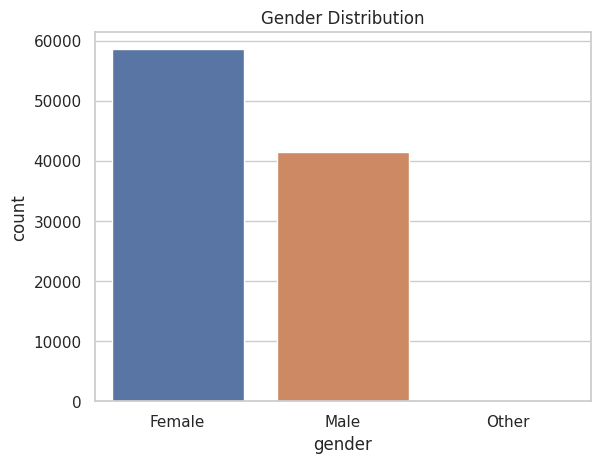

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


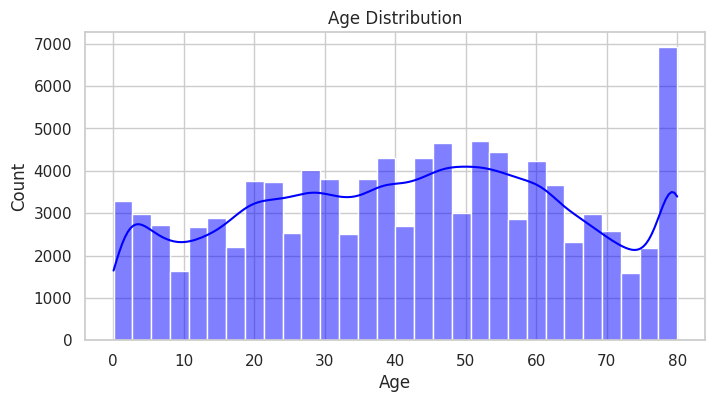

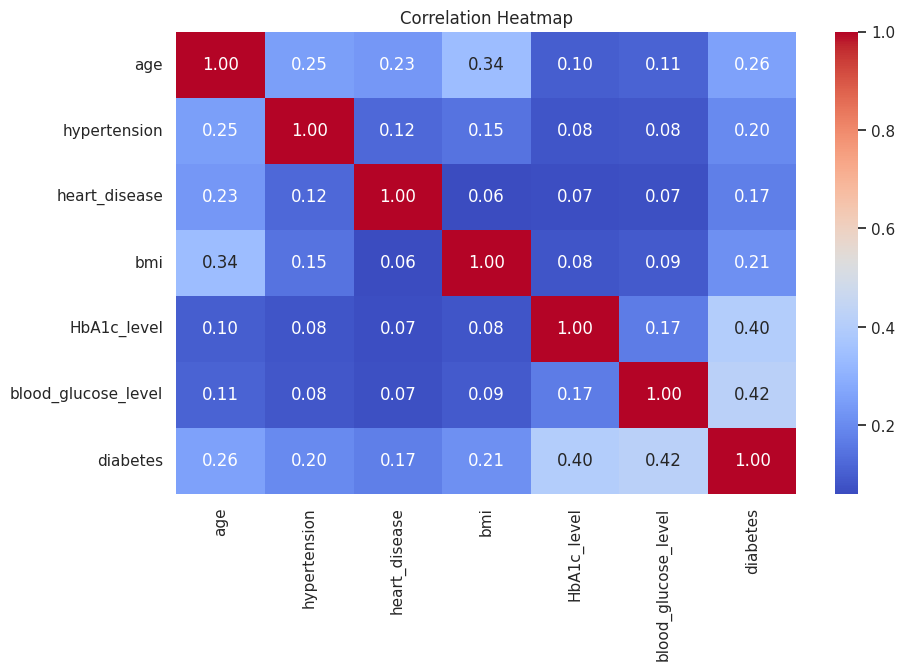

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

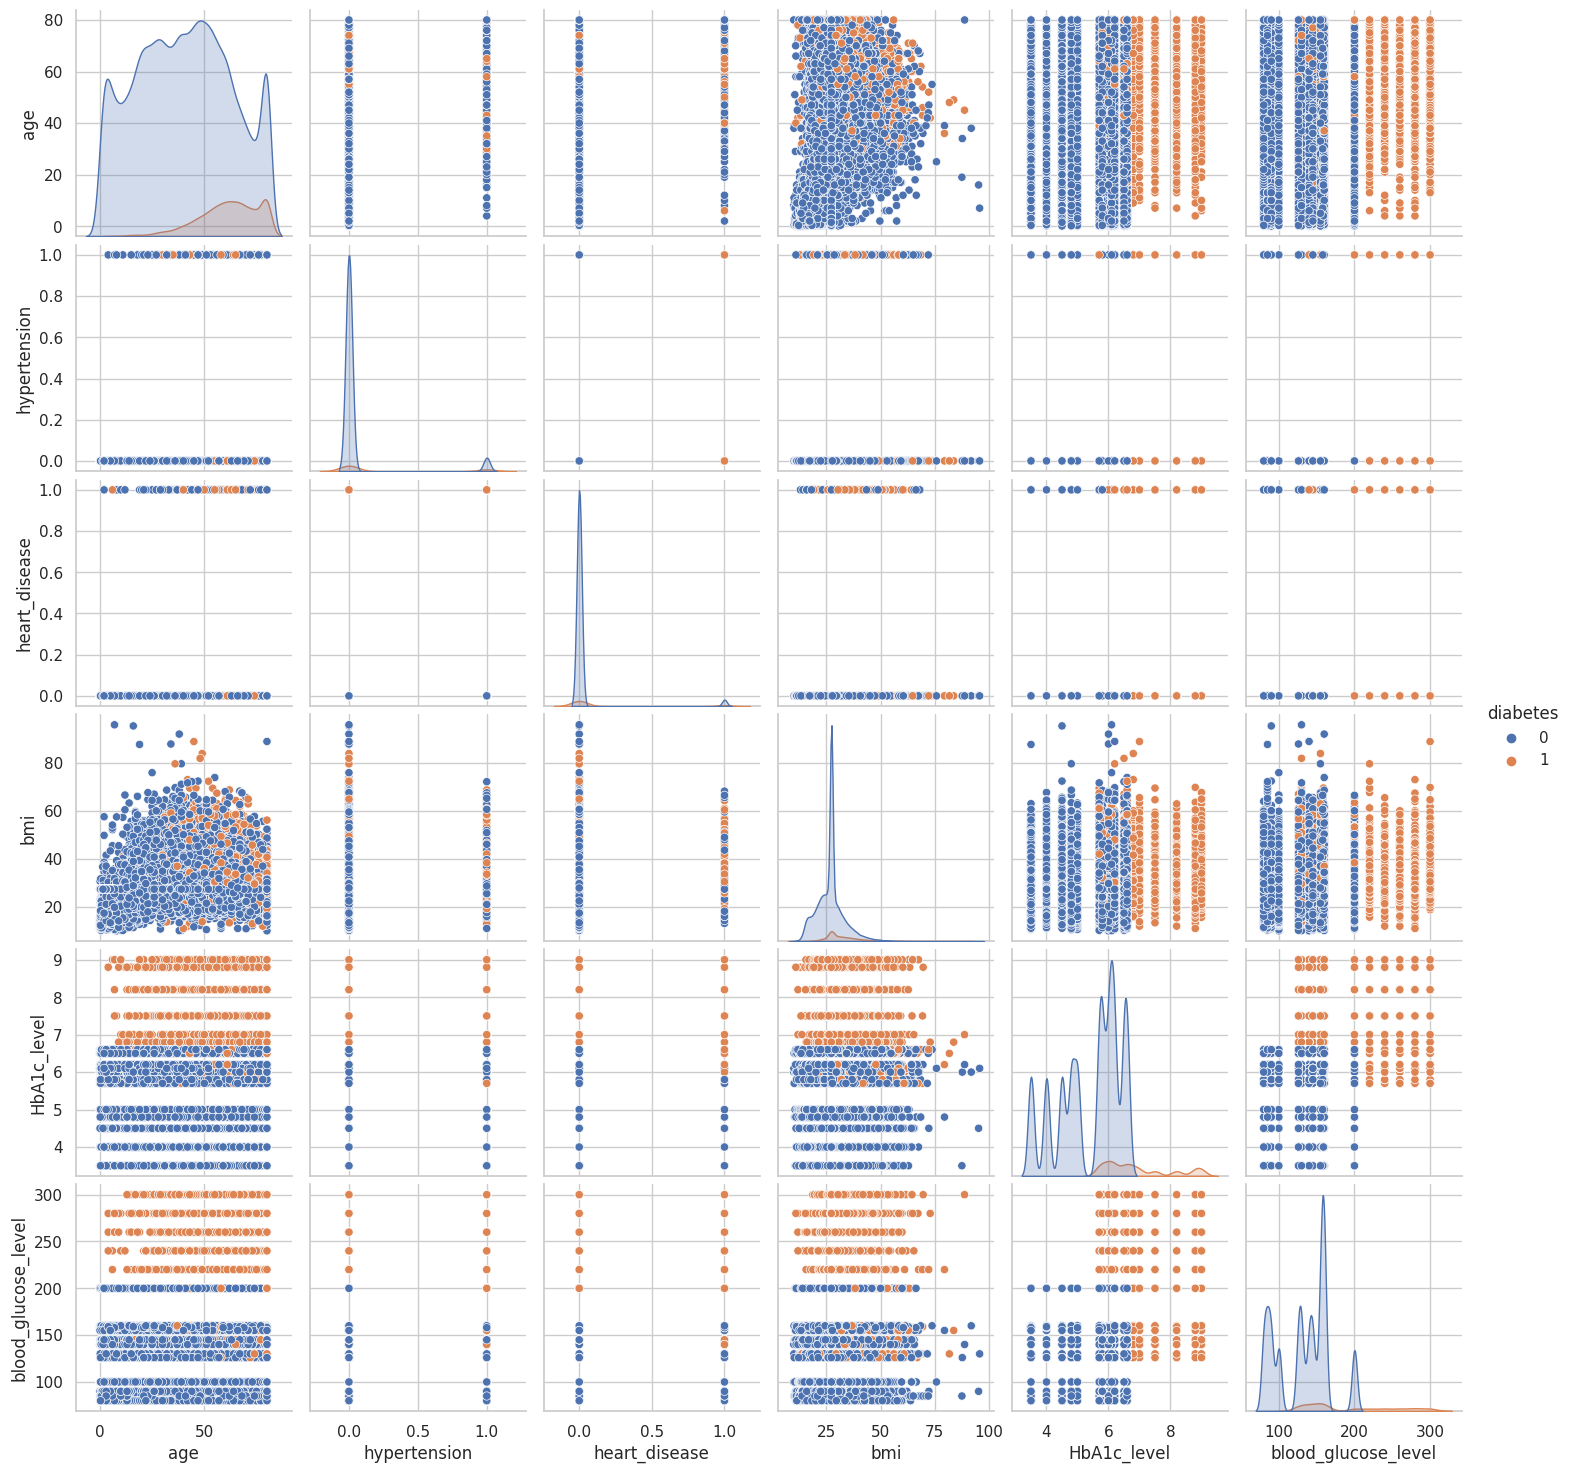


Unique Values by Column:

gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Missing Values by Column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


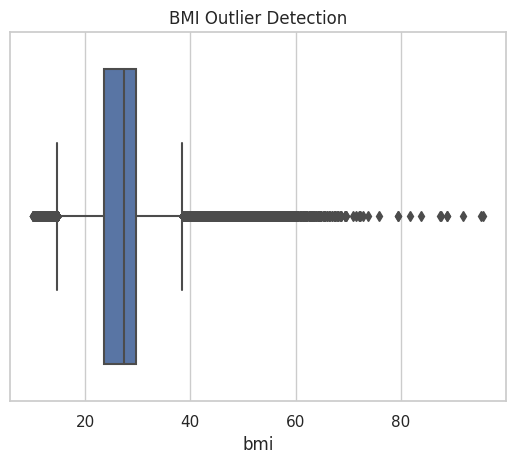

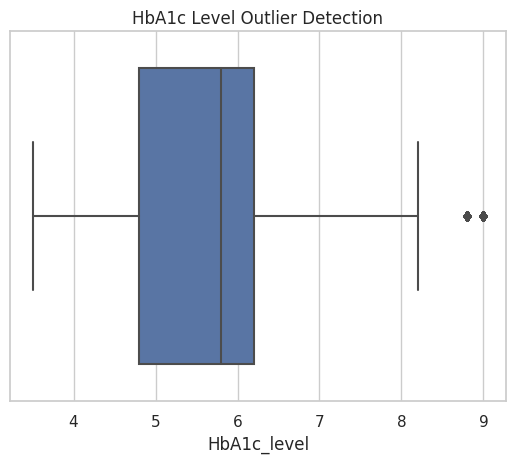


Grouped Aggregations:
     gender smoking_history   mean_bmi  mean_glucose  diabetes_count
0   Female         No Info  25.644239    135.241574             754
1   Female         current  28.365338    137.860815             451
2   Female            ever  28.769071    138.352100             211
3   Female          former  29.498685    140.774822             649
4   Female           never  28.101529    138.273077            2002
5   Female     not current  28.285589    138.938155             394
6     Male         No Info  24.975212    135.239851             700
7     Male         current  28.513874    141.772233             497
8     Male            ever  28.753309    140.525779             261
9     Male          former  29.748034    145.759065             941
10    Male           never  28.109054    139.635769            1344
11    Male     not current  28.089014    140.144893             296
12   Other         No Info  26.805000    155.833333               0
13   Other            ev

In [8]:


# Kaggle Notebook Script for Diabetes Prediction Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data =pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

sns.set(style='whitegrid')

# Display basic information and initial rows
print("Dataset Information:\n")
data.info()
print("\nFirst 5 Rows:\n", data.head())

# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:\n")
print(data.describe())

# Gender distribution
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
# Encode categorical columns or exclude them from correlation analysis
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# Pairwise relationships
sns.pairplot(data, hue='diabetes')
plt.show()

# Unique values in categorical columns
print("\nUnique Values by Column:\n")
for column in data.select_dtypes(include=['object']):
    print(f"{column}: {data[column].unique()}")

# Missing value analysis
print("\nMissing Values by Column:\n", data.isnull().sum())

# Outlier detection using boxplot for 'bmi' and 'HbA1c_level'
sns.boxplot(x=data['bmi'])
plt.title('BMI Outlier Detection')
plt.show()

sns.boxplot(x=data['HbA1c_level'])
plt.title('HbA1c Level Outlier Detection')
plt.show()

# Grouped aggregations by 'gender' and 'smoking_history'
grouped = data.groupby(['gender', 'smoking_history']).agg(
    mean_bmi=('bmi', 'mean'),
    mean_glucose=('blood_glucose_level', 'mean'),
    diabetes_count=('diabetes', 'sum')
).reset_index()
print("\nGrouped Aggregations:\n", grouped)

# Data Preprocessing
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

X = data.drop(columns=['diabetes'])
y = data['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
